## Model Testing when excluding one undefined variable

### Import Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb
from lightgbm import LGBMClassifier

### Import data and cleaning

In [2]:
# Read the data into df
df = pd.read_csv("D:/Documents/Data Science Learning/My Project/Recruitment Scam/02-data/recruitment_cleaned.csv")

# Take a look at the first 10 rows of the dataset
df.head(10)

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,in_balanced_dataset,country,state
0,Marketing Intern,"US, NY, New York","<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,0,1,0,Other,Internship,Unspecified,Marketing,0,0,US,NY
1,Customer Service - Cloud Video Production,"NZ, , Auckland","<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,0,1,0,Full-time,Not Applicable,Unspecified,Customer Service,0,0,NZ,N
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,0,1,0,Full-time,Mid-Senior level,Unspecified,Administrative,0,0,US,IA
3,Account Executive - Washington DC,"US, DC, Washington",<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Sales,0,0,US,DC
4,Bill Review Manager,"US, FL, Fort Worth",<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Health Care Provider,0,0,US,FL
5,Accounting Clerk,"US, MD,",NaN,<p><b>Job Overview</b></p>\r\n<p>Apex is an en...,NaN,NaN,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Administrative,0,0,US,MD
6,Head of Content (m/f),"DE, BE, Berlin","<p>Founded in 2009, the <b>Fonpit AG</b> rose ...",<p><b>Your Responsibilities:</b></p>\r\n<p> </...,<p><b>Your Know-How:</b></p>\r\n<p><b> ...,<p><b>Your Benefits:</b></p>\r\n<p> </p>\r\n<u...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Management,0,0,DE,BE
7,Lead Guest Service Specialist,"US, CA, San Francisco",<p>Airenvy’s mission is to provide lucrative y...,<h3>Who is Airenvy?</h3>\r\n<p>Hey there! We a...,"<ul>\r\n<li>Experience with CRM software, live...",<p><b>Competitive Pay.</b> You'll be able to e...,0,1,1,Full-time,Entry level,Unspecified,Management,0,0,US,CA
8,HP BSM SME,"US, FL, Pensacola",<p>Solutions3 is a <b>woman-owned small busine...,<p></p>\r\n<p></p>\r\n<p>Implementation/Config...,<p><b>MUST BE A US CITIZEN.</b></p>\r\n<p><b>A...,NaN,0,1,1,Full-time,Associate,Bachelor's Degree,Information Technology,0,0,US,FL
9,Customer Service Associate - Part Time,"US, AZ, Phoenix","<p>Novitex Enterprise Solutions, formerly Pitn...",<p>The Customer Service Associate will be base...,<p><b>Minimum Requirements:</b></p>\r\n<ul>\r\...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Customer Service,0,0,US,AZ


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17645 entries, 0 to 17644
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17645 non-null  object
 1   location             17302 non-null  object
 2   company_profile      14358 non-null  object
 3   description          17645 non-null  object
 4   requirements         14995 non-null  object
 5   benefits             10542 non-null  object
 6   telecommuting        17645 non-null  int64 
 7   has_company_logo     17645 non-null  int64 
 8   has_questions        17645 non-null  int64 
 9   employment_type      17645 non-null  object
 10  required_experience  17645 non-null  object
 11  required_education   17645 non-null  object
 12  function             17645 non-null  object
 13  fraudulent           17645 non-null  int64 
 14  in_balanced_dataset  17645 non-null  int64 
 15  country              17645 non-null  object
 16  stat

In [4]:
df['location'] = df['location'].fillna('')
df['company_profile'] = df['company_profile'].fillna('')
df['requirements'] = df['requirements'].fillna('')
df['benefits'] = df['benefits'].fillna('')
df['state'] = df['state'].fillna('')

In [5]:
df.isnull().sum()

title                  0
location               0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
function               0
fraudulent             0
in_balanced_dataset    0
country                0
state                  0
dtype: int64

In [6]:
# Metadata df, excluding state
df_structured = df.copy()
df_structured = df_structured.iloc[:, 6:16]

# Text df
df_text = df.copy()
df_text = df_text.iloc[:, [0, 1, 2, 3, 4, 5, 13]]

In [7]:
df_structured.shape, df_text.shape

((17645, 10), (17645, 7))

In [8]:
df_structured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17645 entries, 0 to 17644
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   telecommuting        17645 non-null  int64 
 1   has_company_logo     17645 non-null  int64 
 2   has_questions        17645 non-null  int64 
 3   employment_type      17645 non-null  object
 4   required_experience  17645 non-null  object
 5   required_education   17645 non-null  object
 6   function             17645 non-null  object
 7   fraudulent           17645 non-null  int64 
 8   in_balanced_dataset  17645 non-null  int64 
 9   country              17645 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.3+ MB


In [9]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17645 entries, 0 to 17644
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            17645 non-null  object
 1   location         17645 non-null  object
 2   company_profile  17645 non-null  object
 3   description      17645 non-null  object
 4   requirements     17645 non-null  object
 5   benefits         17645 non-null  object
 6   fraudulent       17645 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 965.1+ KB


In [10]:
# Concatenate them into a new column
df_text['text'] = df_text['title'] + ' ' + df_text['location'] + ' ' + df_text['company_profile'] + ' ' + \
                  df_text['description'] + ' ' + df_text['requirements'] + ' ' + df_text['benefits']

In [11]:
df2 = df.copy()
df2['raw_word_count'] = df_text['text'].apply(lambda x: len(x.split()))
df2.head(4)

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,in_balanced_dataset,country,state,raw_word_count
0,Marketing Intern,"US, NY, New York","<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,,0,1,0,Other,Internship,Unspecified,Marketing,0,0,US,NY,410
1,Customer Service - Cloud Video Production,"NZ, , Auckland","<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,0,1,0,Full-time,Not Applicable,Unspecified,Customer Service,0,0,NZ,N,966
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,,0,1,0,Full-time,Mid-Senior level,Unspecified,Administrative,0,0,US,IA,385
3,Account Executive - Washington DC,"US, DC, Washington",<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Sales,0,0,US,DC,773


In [12]:
# New structured df with the new feature
df_structured = df2.copy()
df_structured = df_structured.iloc[:, [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17]]
df_structured

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,in_balanced_dataset,country,raw_word_count
0,0,1,0,Other,Internship,Unspecified,Marketing,0,0,US,410
1,0,1,0,Full-time,Not Applicable,Unspecified,Customer Service,0,0,NZ,966
2,0,1,0,Full-time,Mid-Senior level,Unspecified,Administrative,0,0,US,385
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Sales,0,0,US,773
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Health Care Provider,0,0,US,519
...,...,...,...,...,...,...,...,...,...,...,...
17640,0,1,1,Full-time,Mid-Senior level,Unspecified,Sales,0,0,CA,909
17641,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Accounting/Auditing,0,0,US,713
17642,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Engineering,0,0,US,419
17643,0,0,1,Contract,Not Applicable,Professional,Design,0,0,NG,203


In [13]:
# Drop the in_balanced_dataset column
df_structured = df_structured.drop(columns='in_balanced_dataset')
df_structured

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,country,raw_word_count
0,0,1,0,Other,Internship,Unspecified,Marketing,0,US,410
1,0,1,0,Full-time,Not Applicable,Unspecified,Customer Service,0,NZ,966
2,0,1,0,Full-time,Mid-Senior level,Unspecified,Administrative,0,US,385
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Sales,0,US,773
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Health Care Provider,0,US,519
...,...,...,...,...,...,...,...,...,...,...
17640,0,1,1,Full-time,Mid-Senior level,Unspecified,Sales,0,CA,909
17641,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Accounting/Auditing,0,US,713
17642,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Engineering,0,US,419
17643,0,0,1,Contract,Not Applicable,Professional,Design,0,NG,203


### Oversampling

In [14]:
# Perform the train test stratified split
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(pd.get_dummies(df_structured.drop(columns='fraudulent')), 
                                                                        df_structured['fraudulent'], 
                                                                        test_size=0.2, random_state=123)

# Oversampling
oversample = RandomOverSampler(sampling_strategy=0.6667, random_state=123)

# Transform the data
X_train_over, y_train_over = oversample.fit_resample(X_train_over, y_train_over)

# View the target distribution
y_train_over.value_counts()

0    13408
1     8939
Name: fraudulent, dtype: int64

#### Second sampling

In [19]:
# Perform the train test stratified split
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(pd.get_dummies(df_structured.drop(columns='fraudulent')), 
                                                                        df_structured['fraudulent'], 
                                                                        test_size=0.2, random_state=123)

# Oversampling
oversample = RandomOverSampler(sampling_strategy=0.8182, random_state=123)

# Transform the data
X_train_over, y_train_over = oversample.fit_resample(X_train_over, y_train_over)

# View the target distribution
y_train_over.value_counts()

0    13408
1    10970
Name: fraudulent, dtype: int64

### LightGBM with oversampling

In [15]:
# Create the model object
lgb_over = LGBMClassifier(random_state=123)

# Train the lgbm model
lgb_over.fit(X_train_over.values, y_train_over, eval_metric='Accuracy')

# Output the test accuracy
lgb_over.score(X_test_over.values, y_test_over)

0.9351090960612072

In [16]:
y_pred = lgb_over.predict(X_test_over.values)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_lgb_over = confusion_matrix(y_test_over, y_pred)
print(conf_lgb_over)
print('\n')

print('Classification Report')
print(classification_report(y_test_over, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3181  198]
 [  31  119]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9903    0.9414    0.9653      3379
       Fraud     0.3754    0.7933    0.5096       150

    accuracy                         0.9351      3529
   macro avg     0.6829    0.8674    0.7374      3529
weighted avg     0.9642    0.9351    0.9459      3529



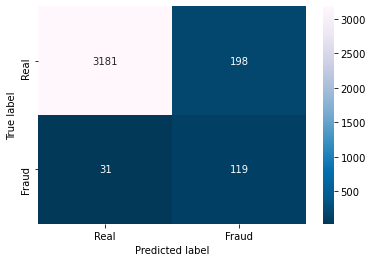

In [17]:
ax = sns.heatmap(conf_lgb_over, annot=True, fmt="d", cmap="PuBu_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

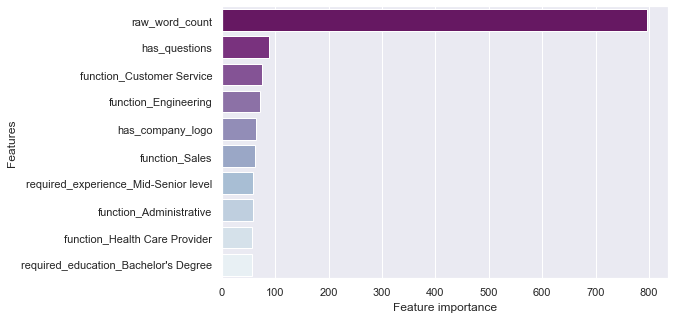

In [18]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(lgb_over.feature_importances_, 
                             index=pd.get_dummies(df_structured.drop(columns='fraudulent')).columns)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1)

sns.barplot(x=feat_importances.nlargest(10).values, y=feat_importances.nlargest(10).index, palette='BuPu_r')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

### Second trial with 45% of minority size

In [20]:
# Create the model object
lgb_over2 = LGBMClassifier(random_state=123)

# Train the lgbm model
lgb_over2.fit(X_train_over.values, y_train_over, eval_metric='Accuracy')

# Output the test accuracy
lgb_over2.score(X_test_over.values, y_test_over)

0.9246245395296118

In [21]:
y_pred = lgb_over2.predict(X_test_over.values)

class_labels = ['Real', 'Fraud']

print('Confusion Matrix')
conf_lgb_over2 = confusion_matrix(y_test_over, y_pred)
print(conf_lgb_over2)
print('\n')

print('Classification Report')
print(classification_report(y_test_over, y_pred, target_names=class_labels, digits=4))

Confusion Matrix
[[3142  237]
 [  29  121]]


Classification Report
              precision    recall  f1-score   support

        Real     0.9909    0.9299    0.9594      3379
       Fraud     0.3380    0.8067    0.4764       150

    accuracy                         0.9246      3529
   macro avg     0.6644    0.8683    0.7179      3529
weighted avg     0.9631    0.9246    0.9389      3529



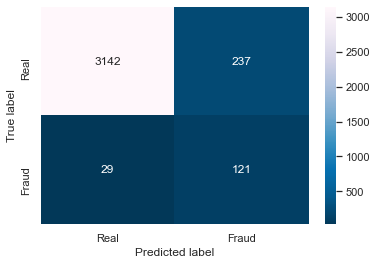

In [22]:
ax = sns.heatmap(conf_lgb_over2, annot=True, fmt="d", cmap="PuBu_r")
ax.set_xticklabels(['Real', 'Fraud'])
ax.set_yticklabels(['Real', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

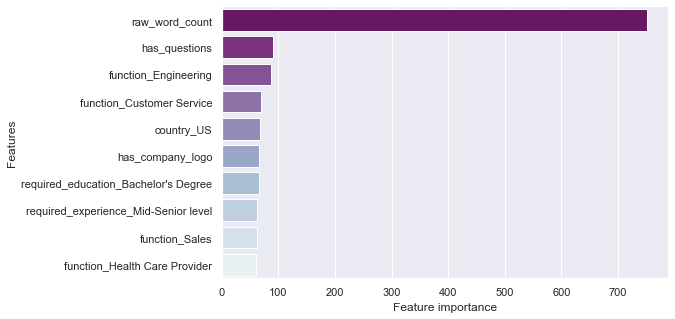

In [23]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(lgb_over2.feature_importances_, 
                             index=pd.get_dummies(df_structured.drop(columns='fraudulent')).columns)

plt.figure(figsize=(8, 5))
sns.set(font_scale=1)

sns.barplot(x=feat_importances.nlargest(10).values, y=feat_importances.nlargest(10).index, palette='BuPu_r')
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.show()

In [27]:
type(X_test_over)

pandas.core.frame.DataFrame

In [33]:
df_structured['country'].unique()

array(['US', 'NZ', 'DE', 'GB', 'AU', 'SG', 'IL', 'AE', 'CA', 'IN', 'EG',
       'PL', 'GR', 'Undefined', 'PK', 'BE', 'BR', 'SA', 'DK', 'RU', 'ZA',
       'CY', 'HK', 'TR', 'IE', 'LT', 'JP', 'NL', 'AT', 'KR', 'FR', 'EE',
       'TH', 'PA', 'KE', 'MU', 'MX', 'RO', 'MY', 'FI', 'CN', 'ES', 'SE',
       'CL', 'UA', 'QA', 'IT', 'LV', 'IQ', 'BG', 'PH', 'CZ', 'VI', 'MT',
       'HU', 'Non-US', 'BD', 'KW', 'LU', 'NG', 'RS', 'BY', 'VN', 'ID',
       'ZM', 'NO', 'BH', 'UG', 'CH', 'US+other', 'TT', 'SD', 'SK', 'AR',
       'TW', 'PT', 'PE', 'CO', 'IS', 'SI', 'MA', 'AM', 'TN', 'GH', 'AL',
       'HR', 'CM', 'SV', 'NI', 'LK', 'JM', 'KZ', 'KH'], dtype=object)

'United States': 'US', 'New Zealand': 'NZ', 'Germany': 'DE', 'Great Britain': 'GB', 'Australia': 'AU', 'Singapore': 'SG', 'Israel': 'IL', 'United Arab Emirates': 'AE', 'Canada': 'CA', 'India': 'IN', 'Egypt': 'EG', 'Poland': 'PL', 'Greece': 'GR', 'Undefined': 'Undefined', 'Pakistan': 'PK', 'Belgium': 'BE', 'Brazil': 'BR', 'Saudi Arabia': 'SA', 'Denmark': 'DK', 'Russia': 'RU', 'South Africa': 'ZA', 'Cyprus': 'CY', 'Hong Kong': 'HK', 'Turkey': 'TR', 'Ireland': 'IE', 'Lithuania': 'LT', 'Japan': 'JP', 'Netherlands': 'NL', 'Austria': 'AT', 'South Korea': 'KR', 'France': 'FR', 'Estonia': 'ES', 'Thailand': 'TH', 'Panama': 'PA', 'Kenya': 'KE', 'Mauritius': 'MU', 'Mexico': 'MX', 'Romania': 'RO', 'Malaysia': 'MY', 'Finland': 'FI', 'China': 'CN', 'Spain': 'ES', 'Sweden': 'SE', 'Chile': 'CL', 'Ukraine': 'UA', 'Qatar': 'QA', 'Italy': 'IT', 'Latvia': 'LV', 'Iraq': 'IQ', 'Bulgaria': 'BG', 'Philippines': 'PH', 'Czech Republic': 'CZ', 'U.S. Virgin Islands': 'VI', 'Malta': 'MT', 'Hungary': 'HU', 'Non-US countries': 'Non-US', 'Bangladesh': 'BD', 'Kuwait': 'KW', 'Luxembourg': 'LU', 'Nigeria': 'NG', 'Serbia': 'RS', 'Belarus': 'BY', 'Vietnam': 'VN', 'Indonesia': 'ID', 'Zambia': 'ZM', 'Norway': 'NO', 'Bahrain': 'BH', 'Uganda': 'UG', 'Switzerland': 'CH', 'U.S. & Other countries': 'US+other', 'Trinidad & Tobago': 'TT', 'Sudan': 'SD', 'Slovakia': 'SK', 'Argentina': 'AR', 'Taiwan': 'TW', 'Portugal': 'PT', 'Peru': 'PE', 'Colombia': 'CO', 'Iceland': 'IS', 'Slovenia': 'SI', 'Morocco': 'MA', 'Armenia': 'AM', 'Tunisia': 'TN', 'Ghana': 'GH', 'Albania': 'AL', 'Croatia': 'HR', 'Cameroon': 'CM', 'El Salvador': 'SV', 'Nicaragua': 'NI', 'Sri Lanka': 'LK', 'Jamaica': 'JM', 'Kazakhstan': 'KZ', 'Cambodia': 'KH'

In [36]:
for i in pd.get_dummies(df_structured.drop(columns='fraudulent')).columns:
    print(i)

telecommuting
has_company_logo
has_questions
raw_word_count
employment_type_Contract
employment_type_Full-time
employment_type_Full-time & Part-time
employment_type_Other
employment_type_Part-time
employment_type_Temporary
required_experience_Associate
required_experience_Director
required_experience_Entry level
required_experience_Executive
required_experience_Internship
required_experience_Mid-Senior level
required_experience_Not Applicable
required_education_Associate Degree
required_education_Bachelor's Degree
required_education_Certification
required_education_Doctorate
required_education_Empty requirements
required_education_High School or equivalent
required_education_Master's Degree
required_education_Professional
required_education_Some College Coursework Completed
required_education_Some High School Coursework
required_education_Unspecified
required_education_Vocational
required_education_Vocational - Degree
required_education_Vocational - HS Diploma
function_Accounting/Audit

In [37]:
pd.get_dummies(df_structured.drop(columns='fraudulent')).dtypes

telecommuting               int64
has_company_logo            int64
has_questions               int64
raw_word_count              int64
employment_type_Contract    uint8
                            ...  
country_Undefined           uint8
country_VI                  uint8
country_VN                  uint8
country_ZA                  uint8
country_ZM                  uint8
Length: 161, dtype: object

In [38]:
pd.get_dummies(df_structured.drop(columns='fraudulent'))

,telecommuting,has_company_logo,has_questions,raw_word_count,employment_type_Contract,employment_type_Full-time,employment_type_Full-time & Part-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,...,country_TW,country_UA,country_UG,country_US,country_US+other,country_Undefined,country_VI,country_VN,country_ZA,country_ZM
0,0,1,0,410,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,0,966,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,385,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,773,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,1,519,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17640,0,1,1,909,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17641,0,1,1,713,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17642,0,0,0,419,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17643,0,0,1,203,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
pd.get_dummies(df_structured.drop(columns='fraudulent')).loc[0, 'employment_type' + '_' + 'Full-time']

0

In [44]:
lgb_over2.predict(pd.DataFrame(int(0), index=np.arange(1), columns=[
    "telecommuting", "has_company_logo", "has_questions", "raw_word_count", "employment_type_Contract", "employment_type_Full-time", 
    "employment_type_Full-time & Part-time", "employment_type_Other", "employment_type_Part-time", "employment_type_Temporary", 
    "required_experience_Associate", "required_experience_Director", "required_experience_Entry level", "required_experience_Executive", 
    "required_experience_Internship", "required_experience_Mid-Senior level", "required_experience_Not Applicable", 
    "required_education_Associate Degree", "required_education_Bachelor's Degree", "required_education_Certification", 
    "required_education_Doctorate", "required_education_Empty requirements", "required_education_High School or equivalent", 
    "required_education_Master's Degree", "required_education_Professional", "required_education_Some College Coursework Completed", 
    "required_education_Some High School Coursework", "required_education_Unspecified", "required_education_Vocational", 
    "required_education_Vocational - Degree", "required_education_Vocational - HS Diploma", "function_Accounting/Auditing", 
    "function_Administrative", "function_Advertising", "function_Art/Creative", "function_Business Analyst", "function_Business Development", 
    "function_Consulting", "function_Customer Service", "function_Data Analyst", "function_Design", "function_Distribution", 
    "function_Education", "function_Engineering", "function_Finance", "function_Financial Analyst", "function_General Business", 
    "function_Health Care Provider", "function_Human Resources", "function_Information Technology", "function_Legal", 
    "function_Management", "function_Manufacturing", "function_Marketing", "function_Other", "function_Product Management", 
    "function_Production", "function_Project Management", "function_Public Relations", "function_Purchasing", "function_Quality Assurance", 
    "function_Research", "function_Sales", "function_Science", "function_Strategy/Planning", "function_Supply Chain", 
    "function_Training", "function_Writing/Editing", "country_AE", "country_AL", "country_AM", "country_AR", "country_AT", 
    "country_AU", "country_BD", "country_BE", "country_BG", "country_BH", "country_BR", "country_BY", "country_CA", "country_CH", 
    "country_CL", "country_CM", "country_CN", "country_CO", "country_CY", "country_CZ", "country_DE", "country_DK", "country_EE", 
    "country_EG", "country_ES", "country_FI", "country_FR", "country_GB", "country_GH", "country_GR", "country_HK", "country_HR", 
    "country_HU", "country_ID", "country_IE", "country_IL", "country_IN", "country_IQ", "country_IS", "country_IT", "country_JM", 
    "country_JP", "country_KE", "country_KH", "country_KR", "country_KW", "country_KZ", "country_LK", "country_LT", "country_LU", 
    "country_LV", "country_MA", "country_MT", "country_MU", "country_MX", "country_MY", "country_NG", "country_NI", "country_NL", 
    "country_NO", "country_NZ", "country_Non-US", "country_PA", "country_PE", "country_PH", "country_PK", "country_PL", 
    "country_PT", "country_QA", "country_RO", "country_RS", "country_RU", "country_SA", "country_SD", "country_SE", "country_SG", 
    "country_SI", "country_SK", "country_SV", "country_TH", "country_TN", "country_TR", "country_TT", "country_TW", "country_UA", 
    "country_UG", "country_US", "country_US+other", "country_Undefined", "country_VI", "country_VN", "country_ZA", "country_ZM"
]).values)[0]

1

In [42]:
X_test_over

,telecommuting,has_company_logo,has_questions,raw_word_count,employment_type_Contract,employment_type_Full-time,employment_type_Full-time & Part-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,...,country_TW,country_UA,country_UG,country_US,country_US+other,country_Undefined,country_VI,country_VN,country_ZA,country_ZM
16857,0,1,1,622,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12591,0,1,1,531,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8253,0,1,1,750,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9258,0,1,1,81,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8053,0,1,1,756,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16812,0,0,0,298,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5862,0,1,1,384,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4115,0,1,0,672,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10424,0,0,0,215,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [41]:
pd.DataFrame(int(0), index=np.arange(1), columns=[
    "telecommuting", "has_company_logo", "has_questions", "raw_word_count", "employment_type_Contract", "employment_type_Full-time", 
    "employment_type_Full-time & Part-time", "employment_type_Other", "employment_type_Part-time", "employment_type_Temporary", 
    "required_experience_Associate", "required_experience_Director", "required_experience_Entry level", "required_experience_Executive", 
    "required_experience_Internship", "required_experience_Mid-Senior level", "required_experience_Not Applicable", 
    "required_education_Associate Degree", "required_education_Bachelor's Degree", "required_education_Certification", 
    "required_education_Doctorate", "required_education_Empty requirements", "required_education_High School or equivalent", 
    "required_education_Master's Degree", "required_education_Professional", "required_education_Some College Coursework Completed", 
    "required_education_Some High School Coursework", "required_education_Unspecified", "required_education_Vocational", 
    "required_education_Vocational - Degree", "required_education_Vocational - HS Diploma", "function_Accounting/Auditing", 
    "function_Administrative", "function_Advertising", "function_Art/Creative", "function_Business Analyst", "function_Business Development", 
    "function_Consulting", "function_Customer Service", "function_Data Analyst", "function_Design", "function_Distribution", 
    "function_Education", "function_Engineering", "function_Finance", "function_Financial Analyst", "function_General Business", 
    "function_Health Care Provider", "function_Human Resources", "function_Information Technology", "function_Legal", 
    "function_Management", "function_Manufacturing", "function_Marketing", "function_Other", "function_Product Management", 
    "function_Production", "function_Project Management", "function_Public Relations", "function_Purchasing", "function_Quality Assurance", 
    "function_Research", "function_Sales", "function_Science", "function_Strategy/Planning", "function_Supply Chain", 
    "function_Training", "function_Writing/Editing", "country_AE", "country_AL", "country_AM", "country_AR", "country_AT", 
    "country_AU", "country_BD", "country_BE", "country_BG", "country_BH", "country_BR", "country_BY", "country_CA", "country_CH", 
    "country_CL", "country_CM", "country_CN", "country_CO", "country_CY", "country_CZ", "country_DE", "country_DK", "country_EE", 
    "country_EG", "country_ES", "country_FI", "country_FR", "country_GB", "country_GH", "country_GR", "country_HK", "country_HR", 
    "country_HU", "country_ID", "country_IE", "country_IL", "country_IN", "country_IQ", "country_IS", "country_IT", "country_JM", 
    "country_JP", "country_KE", "country_KH", "country_KR", "country_KW", "country_KZ", "country_LK", "country_LT", "country_LU", 
    "country_LV", "country_MA", "country_MT", "country_MU", "country_MX", "country_MY", "country_NG", "country_NI", "country_NL", 
    "country_NO", "country_NZ", "country_Non-US", "country_PA", "country_PE", "country_PH", "country_PK", "country_PL", 
    "country_PT", "country_QA", "country_RO", "country_RS", "country_RU", "country_SA", "country_SD", "country_SE", "country_SG", 
    "country_SI", "country_SK", "country_SV", "country_TH", "country_TN", "country_TR", "country_TT", "country_TW", "country_UA", 
    "country_UG", "country_US", "country_US+other", "country_Undefined", "country_VI", "country_VN", "country_ZA", "country_ZM"
])

,telecommuting,has_company_logo,has_questions,raw_word_count,employment_type_Contract,employment_type_Full-time,employment_type_Full-time & Part-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,...,country_TW,country_UA,country_UG,country_US,country_US+other,country_Undefined,country_VI,country_VN,country_ZA,country_ZM
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
[
    "telecommuting", "has_company_logo", "has_questions", "raw_word_count", "employment_type_Contract", "employment_type_Full-time", 
    "employment_type_Full-time & Part-time", "employment_type_Other", "employment_type_Part-time", "employment_type_Temporary", 
    "required_experience_Associate", "required_experience_Director", "required_experience_Entry level", "required_experience_Executive", 
    "required_experience_Internship", "required_experience_Mid-Senior level", "required_experience_Not Applicable", 
    "required_education_Associate Degree", "required_education_Bachelor's Degree", "required_education_Certification", 
    "required_education_Doctorate", "required_education_Empty requirements", "required_education_High School or equivalent", 
    "required_education_Master's Degree", "required_education_Professional", "required_education_Some College Coursework Completed", 
    "required_education_Some High School Coursework", "required_education_Unspecified", "required_education_Vocational", 
    "required_education_Vocational - Degree", "required_education_Vocational - HS Diploma", "function_Accounting/Auditing", 
    "function_Administrative", "function_Advertising", "function_Art/Creative", "function_Business Analyst", "function_Business Development", 
    "function_Consulting", "function_Customer Service", "function_Data Analyst", "function_Design", "function_Distribution", 
    "function_Education", "function_Engineering", "function_Finance", "function_Financial Analyst", "function_General Business", 
    "function_Health Care Provider", "function_Human Resources", "function_Information Technology", "function_Legal", 
    "function_Management", "function_Manufacturing", "function_Marketing", "function_Other", "function_Product Management", 
    "function_Production", "function_Project Management", "function_Public Relations", "function_Purchasing", "function_Quality Assurance", 
    "function_Research", "function_Sales", "function_Science", "function_Strategy/Planning", "function_Supply Chain", 
    "function_Training", "function_Writing/Editing", "country_AE", "country_AL", "country_AM", "country_AR", "country_AT", 
    "country_AU", "country_BD", "country_BE", "country_BG", "country_BH", "country_BR", "country_BY", "country_CA", "country_CH", 
    "country_CL", "country_CM", "country_CN", "country_CO", "country_CY", "country_CZ", "country_DE", "country_DK", "country_EE", 
    "country_EG", "country_ES", "country_FI", "country_FR", "country_GB", "country_GH", "country_GR", "country_HK", "country_HR", 
    "country_HU", "country_ID", "country_IE", "country_IL", "country_IN", "country_IQ", "country_IS", "country_IT", "country_JM", 
    "country_JP", "country_KE", "country_KH", "country_KR", "country_KW", "country_KZ", "country_LK", "country_LT", "country_LU", 
    "country_LV", "country_MA", "country_MT", "country_MU", "country_MX", "country_MY", "country_NG", "country_NI", "country_NL", 
    "country_NO", "country_NZ", "country_Non-US", "country_PA", "country_PE", "country_PH", "country_PK", "country_PL", 
    "country_PT", "country_QA", "country_RO", "country_RS", "country_RU", "country_SA", "country_SD", "country_SE", "country_SG", 
    "country_SI", "country_SK", "country_SV", "country_TH", "country_TN", "country_TR", "country_TT", "country_TW", "country_UA", 
    "country_UG", "country_US", "country_US+other", "country_Undefined", "country_VI", "country_VN", "country_ZA", "country_ZM"
]

### Save the model for gradio app

In [24]:
lgb_over2

LGBMClassifier(random_state=123)

In [25]:
# Save the lgbm model from structured data
joblib.dump(lgb_over2, 'RS_lgbm_over_55-45_18072021.pkl')

['RS_lgbm_over_55-45_18072021.pkl']